<a href="https://colab.research.google.com/github/nstagnaro/MAT281-repository/blob/main/Proyecto.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Aplicación de la Matemática a la Ingeniería

Nombre: Nicolás Stagnaro

Rol: 202010526-k

# Introducción

La finalidad de este proyecto es enfrentar a los estudiantes a problemas de Machine Learning con todas las etapas (típicas) que eso implica, basándose en cada uno de los módulos aprendidos a lo largo del curso, dando pie a la investigación y a la solución de problemas operacionales del mundo real.

# Descripción del Proyecto

Bienvenido al año 2912, donde se necesitan tus habilidades de ciencia de datos para resolver un misterio cósmico. Hemos recibido una transmisión desde cuatro años luz de distancia y las cosas no pintan bien.

La nave espacial Titanic fue un transatlántico de pasajeros interestelar lanzado hace un mes. Con casi 13.000 pasajeros a bordo, la nave emprendió su viaje inaugural transportando emigrantes de nuestro sistema solar a tres exoplanetas recientemente habitables que orbitan estrellas cercanas.

Mientras rodeaba Alpha Centauri en ruta hacia su primer destino, el tórrido 55 Cancri E, la desprevenida nave espacial Titanic chocó con una anomalía del espacio-tiempo escondida dentro de una nube de polvo. Lamentablemente, tuvo un destino similar al de su homónimo de 1000 años antes. Aunque la nave permaneció intacta, ¡casi la mitad de los pasajeros fueron transportados a una dimensión alternativa!

<table align='left'>
<tr>
<td><img src='https://camo.githubusercontent.com/cb1a8d0d2a46975160dbf2cf0ce8fd2c0b96ca5780c3de9e63bc9e9c51447723/68747470733a2f2f73746f726167652e676f6f676c65617069732e636f6d2f6b6167676c652d6d656469612f636f6d7065746974696f6e732f537061636573686970253230546974616e69632f6a6f656c2d66696c6970652d51776f4e4168626d4c4c6f2d756e73706c6173682e6a7067' width='500'/> </td>
</tr>
</table>

# Definición del Problema

En este proyecto, la labor es predecir si un pasajero fue transportado a una dimensión alternativa durante la colisión de la nave espacial Titanic'. con la anomalía del espacio-tiempo. Para ayudar a hacer estas predicciones, se le proporciona un conjunto de registros personales recuperados del sistema informático dañado del barco.

### Descripciones de campos de datos y archivos

- **train.csv**: registros personales de aproximadamente dos tercios (~8700) de los pasajeros, que se utilizarán como datos de entrenamiento.

  - PassengerId: una identificación única para cada pasajero. Cada ID toma la forma gggg_pp donde gggg indica un grupo con el que viaja el pasajero y pp es su número dentro del grupo. Las personas de un grupo suelen ser miembros de la familia, pero no siempre.

  - HomePlanet: El planeta del que partió el pasajero, normalmente su planeta de residencia permanente.

  - CryoSleep: Indica si el pasajero optó por ser puesto en animación suspendida durante la duración del viaje. Los pasajeros en criosueño están confinados en sus cabinas.

  - Cabin: El número de cabina donde se hospeda el pasajero. Toma la forma deck/num/side, donde side puede ser P para Puerto o S para Estribor.

  - Destination: El planeta al que desembarcará el pasajero.

  - Age: La edad del pasajero.

  - VIP: Si el pasajero ha pagado por un servicio VIP especial durante el viaje.

  - RoomService, FoodCourt, ShoppingMall, Spa, VRDeck: Cantidad que tiene el pasajero facturado en cada una de las numerosas comodidades de lujo de la Spaceship Titanic.

  - Name: El nombre y apellidos del pasajero.

  - Transported: Si el pasajero fue transportado a otra dimensión. Este es el objetivo, la columna que intentas predecir.

- **test.csv**: registros personales del tercio restante (~4300) de los pasajeros, que se utilizarán como datos de prueba. Tu tarea es predecir el valor de Transported para los pasajeros de este conjunto.

- **sample_submission.csv**: un archivo de envío en el formato correcto.

  - PassengerId: Id de cada pasajero del conjunto de prueba.

  - Transported: El objetivo. Para cada pasajero, predecir True o False.



# Estadística Descriptiva y Visualización

In [ ]:
# Plotting libraries
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# Scikit learn
import sklearn.preprocessing as skp
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import RobustScaler, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression, Perceptron
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Scikit Metrics
from sklearn.metrics import log_loss, classification_report, accuracy_score, f1_score,roc_auc_score
from sklearn.metrics import accuracy_score, recall_score, precision_score, r2_score

# Data manipulation libraries
import pandas as pd
import numpy as np

# General use
from joblib import dump, load
import warnings
warnings.filterwarnings("ignore")
np.set_printoptions(threshold=False)
#np.set_printoptions(threshold=sys.maxsize)
import time

sns.set(rc={'figure.figsize':(8,4)})
plt.rcParams.update({'font.size': 8})
plt.rc('xtick',labelsize=8)
plt.rc('ytick',labelsize=8)
plt.rc('axes', labelsize=8)
plt.rc('legend',fontsize=10)

COLAB_FLAG = True

In [ ]:
# Se trabaja con el .zip en drive
if COLAB_FLAG:
  print("Mounting your Google Drive ...")

  from google.colab import drive
  drive.flush_and_unmount()
  drive.mount('/content/drive', force_remount=True)

  data_path = "/content/drive/My Drive/MA_datasets/Data/" # Esta es la ruta. Recuerde modificarla acorde a sus necesidades

Mounting your Google Drive ...
Drive not mounted, so nothing to flush and unmount.
Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/MA_datasets/spaceship-titanic.zip' -d '/content/drive/MyDrive/MA_datasets/Data/' #Se hace el unzip y se mueve a una nueva carpeta "Data"

Archive:  /content/drive/MyDrive/MA_datasets/spaceship-titanic.zip
  inflating: /content/drive/MyDrive/MA_datasets/Data/sample_submission.csv  
  inflating: /content/drive/MyDrive/MA_datasets/Data/test.csv  
  inflating: /content/drive/MyDrive/MA_datasets/Data/train.csv  


In [ ]:
!mv "/content/drive/MyDrive/MA_datasets/Data/" "/content/drive/MyDrive" #Movemos la carpeta "Ejemplos" a "content"

In [ ]:
#Actualizamos el data_path
data_path = "/content/drive/MyDrive/Data/"

In [ ]:
train_df = pd.read_csv(data_path + 'train.csv', index_col=0)
test_df = pd.read_csv(data_path + 'test.csv', index_col=0)

In [ ]:
train_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
PassengerId,,,,,,,,,,,,,
0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [ ]:
#Observamos con este info que los dtypes estan bien y que no hay NaN
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8693 entries, 0001_01 to 9280_02
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   HomePlanet    8492 non-null   object 
 1   CryoSleep     8476 non-null   object 
 2   Cabin         8494 non-null   object 
 3   Destination   8511 non-null   object 
 4   Age           8514 non-null   float64
 5   VIP           8490 non-null   object 
 6   RoomService   8512 non-null   float64
 7   FoodCourt     8510 non-null   float64
 8   ShoppingMall  8485 non-null   float64
 9   Spa           8510 non-null   float64
 10  VRDeck        8505 non-null   float64
 11  Name          8493 non-null   object 
 12  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(6)
memory usage: 891.4+ KB


In [ ]:
# Analizamos los valores de cada columna observando que hay valores nan
for col in train_df.columns:
    print(train_df[col].unique().tolist())

['Europa', 'Earth', 'Mars', nan]
[False, True, nan]
['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S', 'F/3/S', 'B/1/P', 'F/1/P', 'G/1/S', 'F/2/P', nan, 'F/3/P', 'F/4/P', 'F/5/P', 'G/0/P', 'F/6/P', 'E/0/S', 'D/0/P', 'C/2/S', 'F/6/S', 'C/0/P', 'F/8/P', 'G/4/S', 'F/9/P', 'D/1/S', 'D/1/P', 'F/8/S', 'F/10/S', 'G/1/P', 'G/2/P', 'B/3/P', 'G/3/P', 'F/10/P', 'E/1/S', 'E/2/S', 'G/6/S', 'F/11/S', 'A/1/S', 'G/7/S', 'F/12/S', 'F/13/S', 'F/14/S', 'E/3/S', 'G/6/P', 'G/10/S', 'F/15/S', 'E/4/S', 'F/16/S', 'F/13/P', 'F/14/P', 'F/17/S', 'D/3/P', 'C/3/S', 'F/18/S', 'F/15/P', 'C/4/S', 'G/13/S', 'F/16/P', 'G/14/S', 'C/5/S', 'F/17/P', 'E/5/S', 'G/15/S', 'G/16/S', 'F/20/S', 'G/9/P', 'A/2/S', 'G/11/P', 'F/19/P', 'G/12/P', 'F/23/S', 'F/24/S', 'G/18/S', 'F/21/P', 'D/2/S', 'G/19/S', 'B/5/P', 'E/6/S', 'B/1/S', 'F/23/P', 'G/20/S', 'F/24/P', 'D/4/P', 'A/0/P', 'F/25/P', 'G/21/S', 'F/27/P', 'F/27/S', 'E/7/S', 'D/3/S', 'E/8/S', 'G/22/S', 'F/29/S', 'D/5/S', 'G/17/P', 'G/23/S', 'G/18/P', 'E/5/P', 'C/6/S', '

In [ ]:
# Reemplazamos los nan con la moda en cada columna asociada a variables categoricas
cat_predictors = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name', 'Transported']
for col in cat_predictors:
    train_df[col] = train_df[col].fillna(train_df[col].mode()[0])

In [ ]:
# Reemplazamos los nan con la media en cada columna asociada a variables continuas
train_df = train_df.fillna(train_df.mean())

In [ ]:
# Vemos que ahora no hay nan
for col in train_df.columns:
    print(train_df[col].unique().tolist())

['Europa', 'Earth', 'Mars']
[False, True]
['B/0/P', 'F/0/S', 'A/0/S', 'F/1/S', 'F/0/P', 'F/2/S', 'G/0/S', 'F/3/S', 'B/1/P', 'F/1/P', 'G/1/S', 'F/2/P', 'G/734/S', 'F/3/P', 'F/4/P', 'F/5/P', 'G/0/P', 'F/6/P', 'E/0/S', 'D/0/P', 'C/2/S', 'F/6/S', 'C/0/P', 'F/8/P', 'G/4/S', 'F/9/P', 'D/1/S', 'D/1/P', 'F/8/S', 'F/10/S', 'G/1/P', 'G/2/P', 'B/3/P', 'G/3/P', 'F/10/P', 'E/1/S', 'E/2/S', 'G/6/S', 'F/11/S', 'A/1/S', 'G/7/S', 'F/12/S', 'F/13/S', 'F/14/S', 'E/3/S', 'G/6/P', 'G/10/S', 'F/15/S', 'E/4/S', 'F/16/S', 'F/13/P', 'F/14/P', 'F/17/S', 'D/3/P', 'C/3/S', 'F/18/S', 'F/15/P', 'C/4/S', 'G/13/S', 'F/16/P', 'G/14/S', 'C/5/S', 'F/17/P', 'E/5/S', 'G/15/S', 'G/16/S', 'F/20/S', 'G/9/P', 'A/2/S', 'G/11/P', 'F/19/P', 'G/12/P', 'F/23/S', 'F/24/S', 'G/18/S', 'F/21/P', 'D/2/S', 'G/19/S', 'B/5/P', 'E/6/S', 'B/1/S', 'F/23/P', 'G/20/S', 'F/24/P', 'D/4/P', 'A/0/P', 'F/25/P', 'G/21/S', 'F/27/P', 'F/27/S', 'E/7/S', 'D/3/S', 'E/8/S', 'G/22/S', 'F/29/S', 'D/5/S', 'G/17/P', 'G/23/S', 'G/18/P', 'E/5/P', 'C/6/S', 'G/19

In [ ]:
train_df.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000,8693.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.339054,659.739364,1594.434978,597.417440,1124.675871,1133.259049
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,78.000000,118.000000,45.000000,89.000000,71.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


<Axes: >

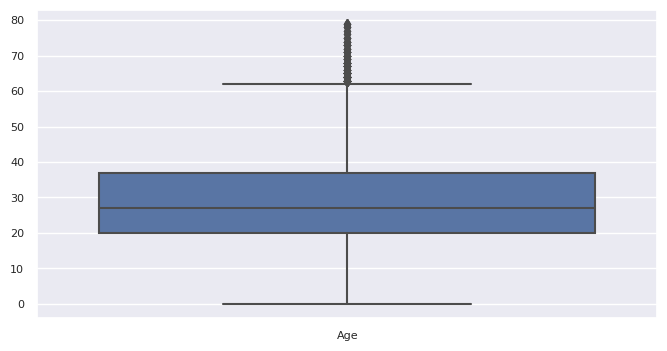

In [ ]:
# Verificamos si hay outliers o no para las variables continuas
sns.boxplot(data=train_df[['Age']])

<Axes: >

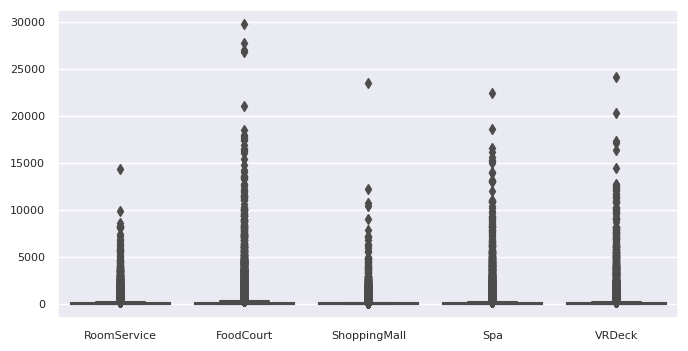

In [ ]:
# Verificamos si hay outliers o no para las variables continuas
aux_df = pd.DataFrame()
cont_predictors = ['RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
for i in cont_predictors:
    aux_df[i] = train_df[i]
sns.boxplot(data=aux_df)

Se observa que todas las variables continuas poseen outliers.

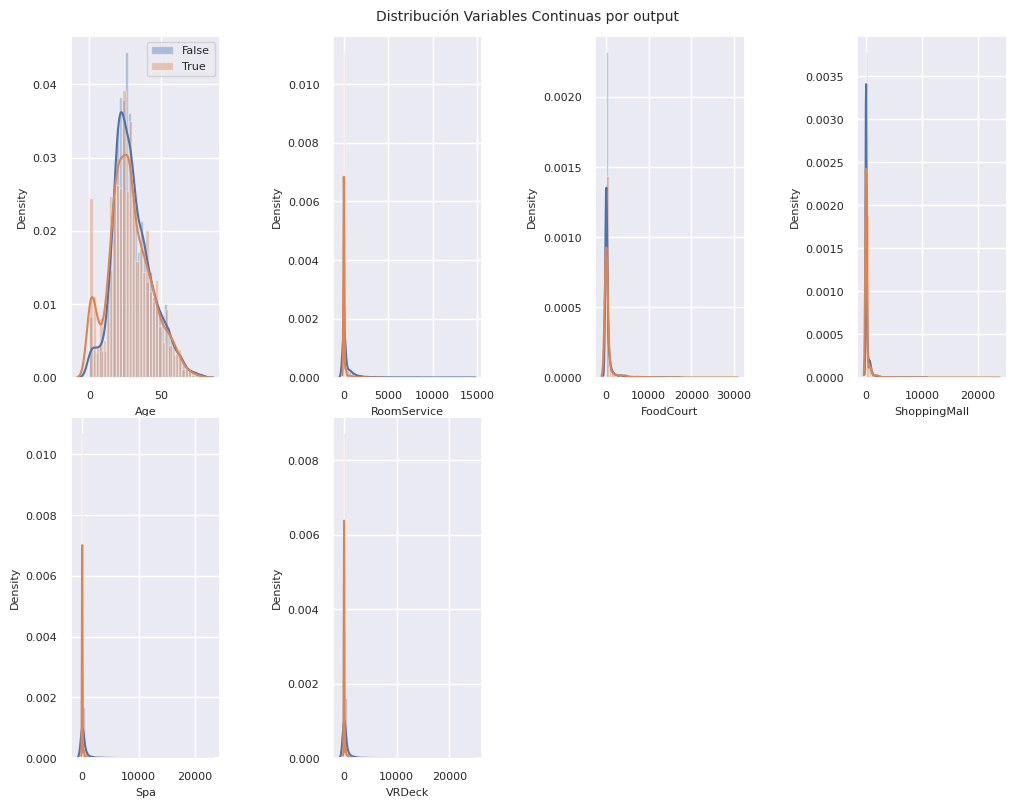

In [ ]:
# Analizaremos que variables continuas separan mejor el output para ir descartando algunas
cont_predictors = ['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck']
fig, axes = plt.subplots(figsize=(10,8), nrows=2, ncols=4)
fig.suptitle('Distribución Variables Continuas por output', fontsize=10)
fig.tight_layout()
fig.subplots_adjust(wspace=0.75)
for i, column in enumerate(cont_predictors):
    for output_class in train_df['Transported'].unique():
        target = train_df.loc[train_df['Transported'] == output_class]
        sns.distplot(target[column], hist=True, rug=False, kde=True,
                   ax=axes[i//4,i%4], label=output_class)
        if i==0:
            axes[0,0].legend(prop={'size': 8})


axes[-1,-2].axis('off')
axes[-1,-1].axis('off')
plt.show()

De donde observamos que las variables continuas que mejor separan las clases a predecir son "RoomService", "FoodCourt", "ShoppingMall" y "Age"

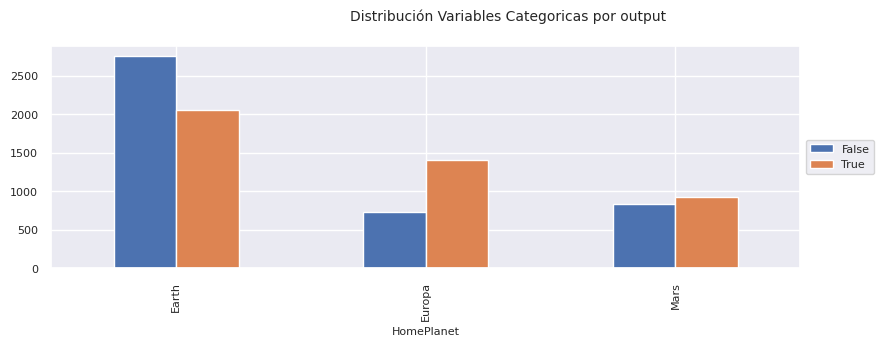

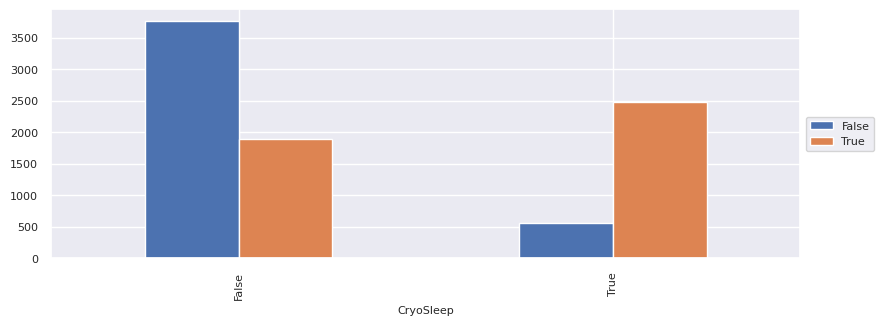

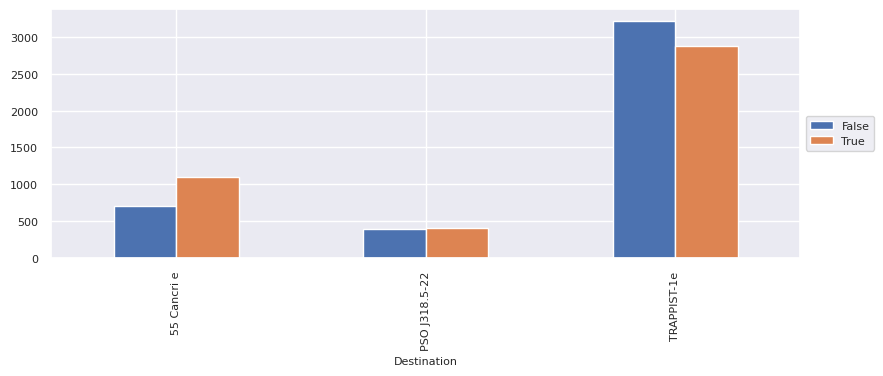

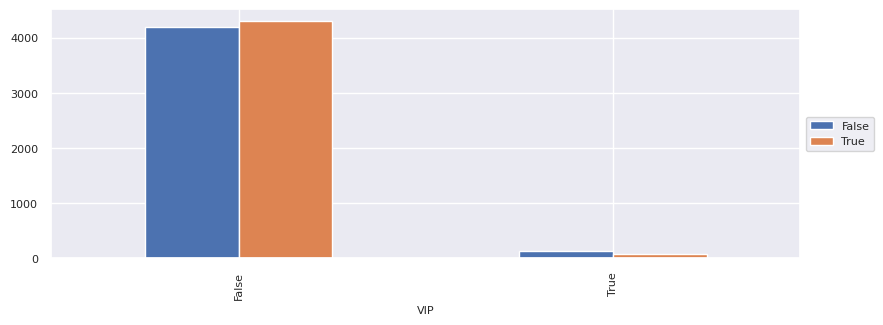

In [ ]:
# Analizaremos que variables categoricas separan mejor el output para ir descartando algunas
# Note que inmediatamente descartamos Cabin y Name, pues poseen demasiadas clases
aux = 0
cat_predictors = ['HomePlanet', 'CryoSleep', 'Destination', 'VIP']
for col in cat_predictors:
    fig, ax = plt.subplots(figsize=(10,3), nrows=1, ncols=1)
    if aux == 0:
        fig.suptitle('Distribución Variables Categoricas por output', fontsize=10)
        aux += 1
    fig.tight_layout()
    fig.subplots_adjust(wspace=0.25)
    df_gb = train_df.groupby([col, 'Transported']).size().unstack(level=1)
    df_gb.plot(kind = 'bar',ax=ax)
    box = ax.get_position()
    ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
    ax.legend(loc='center left', bbox_to_anchor=(1, 0.5),prop={'size': 8})

    plt.show()

De acá observamos que las variables categóricas que mejor separan las clases a predecir son "VIP" y "Destination", que serán las que usaremos en este caso.

# Preprocesamiento

In [ ]:
from sklearn.preprocessing import RobustScaler
X1 = train_df.iloc[:, [4,6,7,8]] #Seleccionamos las columnas de los atributos a normalizar
print(X1.head())
print("\n")
scaler = RobustScaler().fit(X1)
X1_scaler = scaler.transform(X1)
print(X1_scaler)

#Escogemos el metodo "RobustScaler" pues los atributos de las columas seleccionadas en "X" poseen outliers, y en dicho caso
#la mediana y el rango intercuartílico suelen dar mejores resultados (que son usados en este metodo).

              Age  RoomService  FoodCourt  ShoppingMall
PassengerId                                            
0001_01      39.0          0.0        0.0           0.0
0002_01      24.0        109.0        9.0          25.0
0003_01      58.0         43.0     3576.0           0.0
0003_02      33.0          0.0     1283.0         371.0
0004_01      16.0        303.0       70.0         151.0


[[ 0.70588235  0.          0.          0.        ]
 [-0.17647059  1.3974359   0.07627119  0.55555556]
 [ 1.82352941  0.55128205 30.30508475  0.        ]
 ...
 [-0.05882353  0.          0.         41.6       ]
 [ 0.29411765  0.          8.88983051  0.        ]
 [ 1.          1.61538462 39.72881356  0.        ]]


In [ ]:
from sklearn.preprocessing import OrdinalEncoder
X_2 = train_df.iloc[:, [3,5]] #Seleccionamos las columnas de los atributos categoricos
ohe = OrdinalEncoder()
feature_arr = np.array(ohe.fit_transform(X_2))
X = np.concatenate((X1_scaler, feature_arr),axis=1)
data_aux = pd.DataFrame(X, columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Destination", "VIP"])
print(data_aux)

#Usaremos en este caso ordinalencoder, pues asumimos que si hay una relacion jerarquica en las clases de "VIP" y "Destination"
#Por ejemplo en Destination de mejores destinos turisticos y en "VIP" de si lo eres o no
# Cuando no hay este tipo de relacion conviene usar mas otros encoders como OneHotEncoder

           Age  RoomService  FoodCourt  ShoppingMall  Destination  VIP
0     0.705882     0.000000   0.000000      0.000000          2.0  0.0
1    -0.176471     1.397436   0.076271      0.555556          2.0  0.0
2     1.823529     0.551282  30.305085      0.000000          2.0  1.0
3     0.352941     0.000000  10.872881      8.244444          2.0  0.0
4    -0.647059     3.884615   0.593220      3.355556          2.0  0.0
...        ...          ...        ...           ...          ...  ...
8688  0.823529     0.000000  57.788136      0.000000          0.0  1.0
8689 -0.529412     0.000000   0.000000      0.000000          1.0  0.0
8690 -0.058824     0.000000   0.000000     41.600000          2.0  0.0
8691  0.294118     0.000000   8.889831      0.000000          0.0  0.0
8692  1.000000     1.615385  39.728814      0.000000          2.0  0.0

[8693 rows x 6 columns]


In [ ]:
from sklearn.preprocessing import LabelEncoder

y = train_df.iloc[:, -1].values
print(y)
print("\n")

le = LabelEncoder()
y = le.fit_transform(y)
print(y)
print(len(y))

#Transformamos las clases a numeros, False -> 0 y True -> 1
#Tenemos 8693 pasajeros

[False  True False ...  True False  True]


[0 1 0 ... 1 0 1]
8693


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)
print("Tamaño del conjunto de entrenamiento:", len(X_train))
print("Tamaño del conjunto de testeo:", len(X_test))

#Usamos el 80% para entrenar y el 20% restante como test para tener suficientes datos de entrenamiento, y un no tan pequeño
#subconjunto de datos para testear el posterior entrenamiento.

Tamaño del conjunto de entrenamiento: 6954
Tamaño del conjunto de testeo: 1739


# Selección de Modelos, Métricas, Análisis de Resultados y Visualización

In [ ]:
# Modelos
knn_model = KNeighborsClassifier()
rf_model = RandomForestClassifier()
logistic_model = LogisticRegression()
perceptron_model = Perceptron()

In [ ]:
# KNN
# Hiperparametros

parameters = {
        'n_neighbors':[1, 3, 5], 'weights':['uniform', 'distance']}

grid_search = GridSearchCV(knn_model, parameters, cv=3, scoring="accuracy", return_train_score=True, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START n_neighbors=1, weights=uniform..............................
[CV 1/3; 1/6] END n_neighbors=1, weights=uniform;, score=(train=0.833, test=0.597) total time=   0.2s
[CV 2/3; 1/6] START n_neighbors=1, weights=uniform..............................
[CV 2/3; 1/6] END n_neighbors=1, weights=uniform;, score=(train=0.855, test=0.609) total time=   0.1s
[CV 3/3; 1/6] START n_neighbors=1, weights=uniform..............................
[CV 3/3; 1/6] END n_neighbors=1, weights=uniform;, score=(train=0.856, test=0.648) total time=   0.2s
[CV 1/3; 2/6] START n_neighbors=1, weights=distance.............................
[CV 1/3; 2/6] END n_neighbors=1, weights=distance;, score=(train=0.833, test=0.597) total time=   0.0s
[CV 2/3; 2/6] START n_neighbors=1, weights=distance.............................
[CV 2/3; 2/6] END n_neighbors=1, weights=distance;, score=(train=0.855, test=0.609) total time=   0.0s
[CV 3/3; 2/6] START n_n

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 3, 5],
                         'weights': ['uniform', 'distance']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [ ]:
final_clf_1 = grid_search.best_estimator_

In [ ]:
# Mejor modelo para KNN
final_clf_1

KNeighborsClassifier()

In [ ]:
final_clf_1.score(X_test, y_test)

0.6854514088556641

In [ ]:
# Random Forest
# Hiperparametros para Random Forest

parameters = {
        'n_estimators':[10, 15, 20], 'max_features':['log2', 'sqrt']}

grid_search = GridSearchCV(rf_model, parameters, cv=3, scoring="accuracy", return_train_score=True, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START max_features=log2, n_estimators=10..........................
[CV 1/3; 1/6] END max_features=log2, n_estimators=10;, score=(train=0.893, test=0.705) total time=   0.1s
[CV 2/3; 1/6] START max_features=log2, n_estimators=10..........................
[CV 2/3; 1/6] END max_features=log2, n_estimators=10;, score=(train=0.894, test=0.701) total time=   0.1s
[CV 3/3; 1/6] START max_features=log2, n_estimators=10..........................
[CV 3/3; 1/6] END max_features=log2, n_estimators=10;, score=(train=0.881, test=0.720) total time=   0.1s
[CV 1/3; 2/6] START max_features=log2, n_estimators=15..........................
[CV 1/3; 2/6] END max_features=log2, n_estimators=15;, score=(train=0.904, test=0.697) total time=   0.1s
[CV 2/3; 2/6] START max_features=log2, n_estimators=15..........................
[CV 2/3; 2/6] END max_features=log2, n_estimators=15;, score=(train=0.900, test=0.709) total time=   0.1s
[CV 3

GridSearchCV(cv=3, estimator=RandomForestClassifier(),
             param_grid={'max_features': ['log2', 'sqrt'],
                         'n_estimators': [10, 15, 20]},
             return_train_score=True, scoring='accuracy', verbose=10)

In [ ]:
final_clf_2 = grid_search.best_estimator_

In [ ]:
# Mejor modelo para Random Forest
final_clf_2

RandomForestClassifier(n_estimators=20)

In [ ]:
final_clf_2.score(X_test, y_test)

0.7170787809085681

In [ ]:
# Regresor Logistico
# Hiperparametros para Regresor Logistico

parameters = {
        'C':[1.0, 10, 100], 'penalty':['l1', 'l2']}

grid_search = GridSearchCV(logistic_model, parameters, cv=3, scoring="accuracy", return_train_score=True, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START C=1.0, penalty=l1...........................................
[CV 1/3; 1/6] END C=1.0, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 2/3; 1/6] START C=1.0, penalty=l1...........................................
[CV 2/3; 1/6] END C=1.0, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 3/3; 1/6] START C=1.0, penalty=l1...........................................
[CV 3/3; 1/6] END C=1.0, penalty=l1;, score=(train=nan, test=nan) total time=   0.0s
[CV 1/3; 2/6] START C=1.0, penalty=l2...........................................
[CV 1/3; 2/6] END C=1.0, penalty=l2;, score=(train=0.626, test=0.629) total time=   0.0s
[CV 2/3; 2/6] START C=1.0, penalty=l2...........................................
[CV 2/3; 2/6] END C=1.0, penalty=l2;, score=(train=0.629, test=0.608) total time=   0.0s
[CV 3/3; 2/6] START C=1.0, penalty=l2...........................................
[CV 3/3; 2/6] END C=1

GridSearchCV(cv=3, estimator=LogisticRegression(),
             param_grid={'C': [1.0, 10, 100], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [ ]:
final_clf_3 = grid_search.best_estimator_

In [ ]:
# Mejor modelo para Regresor Logistico
final_clf_3

LogisticRegression()

In [ ]:
final_clf_3.score(X_test, y_test)

0.6112708453133985

In [ ]:
# Perceptron
# Hiperparametros para Perceptron

parameters = {
        'eta0':[0.01, 0.1, 1.0], 'penalty':['l1', 'l2']}

grid_search = GridSearchCV(perceptron_model, parameters, cv=3, scoring="accuracy", return_train_score=True, verbose=10)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV 1/3; 1/6] START eta0=0.01, penalty=l1.......................................
[CV 1/3; 1/6] END eta0=0.01, penalty=l1;, score=(train=0.539, test=0.549) total time=   0.0s
[CV 2/3; 1/6] START eta0=0.01, penalty=l1.......................................
[CV 2/3; 1/6] END eta0=0.01, penalty=l1;, score=(train=0.540, test=0.534) total time=   0.0s
[CV 3/3; 1/6] START eta0=0.01, penalty=l1.......................................
[CV 3/3; 1/6] END eta0=0.01, penalty=l1;, score=(train=0.446, test=0.428) total time=   0.0s
[CV 1/3; 2/6] START eta0=0.01, penalty=l2.......................................
[CV 1/3; 2/6] END eta0=0.01, penalty=l2;, score=(train=0.528, test=0.538) total time=   0.0s
[CV 2/3; 2/6] START eta0=0.01, penalty=l2.......................................
[CV 2/3; 2/6] END eta0=0.01, penalty=l2;, score=(train=0.556, test=0.538) total time=   0.0s
[CV 3/3; 2/6] START eta0=0.01, penalty=l2.............................

GridSearchCV(cv=3, estimator=Perceptron(),
             param_grid={'eta0': [0.01, 0.1, 1.0], 'penalty': ['l1', 'l2']},
             return_train_score=True, scoring='accuracy', verbose=10)

In [ ]:
final_clf_4 = grid_search.best_estimator_

In [ ]:
# Mejor modelo para Regresor Perceptron
final_clf_4

Perceptron(eta0=0.1, penalty='l2')

In [ ]:
final_clf_4.score(X_test, y_test)

0.45543415756181715

Se analizan algunas métricas más para los tres mejores modelos, para de esta manera escoger el que se usará para predecir.

              precision    recall  f1-score   support

           0       0.72      0.65      0.68       911
           1       0.65      0.73      0.69       828

    accuracy                           0.69      1739
   macro avg       0.69      0.69      0.69      1739
weighted avg       0.69      0.69      0.69      1739



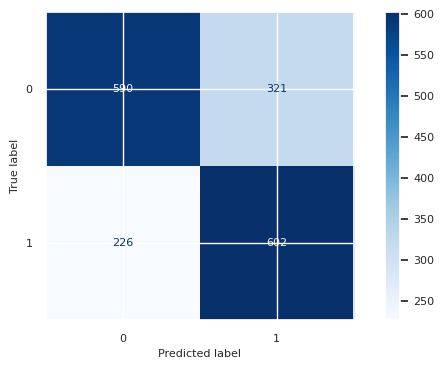

In [ ]:
# KNN
cm = confusion_matrix(y_test, final_clf_1.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #Matriz de confusion para los datos de testeo
disp.plot(cmap = "Blues")
print(classification_report(y_test,final_clf_1.predict(X_test))) #Metricas para los datos de testeo

              precision    recall  f1-score   support

           0       0.76      0.67      0.71       911
           1       0.68      0.77      0.72       828

    accuracy                           0.72      1739
   macro avg       0.72      0.72      0.72      1739
weighted avg       0.72      0.72      0.72      1739



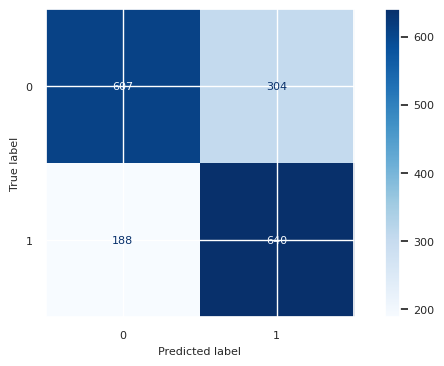

In [ ]:
# Random Forest
cm = confusion_matrix(y_test, final_clf_2.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #Matriz de confusion para los datos de testeo
disp.plot(cmap = "Blues")
print(classification_report(y_test,final_clf_2.predict(X_test))) #Metricas para los datos de testeo

              precision    recall  f1-score   support

           0       0.76      0.38      0.50       911
           1       0.56      0.87      0.68       828

    accuracy                           0.61      1739
   macro avg       0.66      0.62      0.59      1739
weighted avg       0.67      0.61      0.59      1739



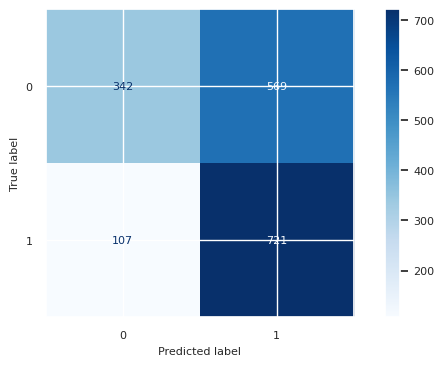

In [ ]:
# Regresor Logistico
cm = confusion_matrix(y_test, final_clf_3.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #Matriz de confusion para los datos de testeo
disp.plot(cmap = "Blues")
print(classification_report(y_test,final_clf_3.predict(X_test))) #Metricas para los datos de testeo

              precision    recall  f1-score   support

           0       0.49      0.70      0.57       911
           1       0.36      0.19      0.25       828

    accuracy                           0.46      1739
   macro avg       0.42      0.44      0.41      1739
weighted avg       0.43      0.46      0.42      1739



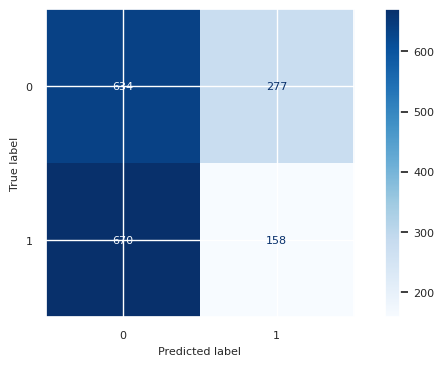

In [ ]:
# Perceptron
cm = confusion_matrix(y_test, final_clf_4.predict(X_test))
disp = ConfusionMatrixDisplay(confusion_matrix=cm) #Matriz de confusion para los datos de testeo
disp.plot(cmap = "Blues")
print(classification_report(y_test,final_clf_4.predict(X_test))) #Metricas para los datos de testeo

Analizando las métricas y las matrices de confusión, se concluye que el método que mejor predice los datos de testeo es el "RandomForestClassifier". Se pueden probar entrenar los modelos anterioremente presentados cambiando las métricas, etc.

In [ ]:
test_df.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name
PassengerId,,,,,,,,,,,,
0013_01,Earth,True,G/3/S,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,Nelly Carsoning
0018_01,Earth,False,F/4/S,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,Lerome Peckers
0019_01,Europa,True,C/0/S,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,Sabih Unhearfus
0021_01,Europa,False,C/1/S,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,Meratz Caltilter
0023_01,Earth,False,F/5/S,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,Brence Harperez


In [ ]:
# Reemplazamos los nan con la moda en cada columna asociada a variables categoricas
cat_predictors = ['HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'VIP', 'Name']
for col in cat_predictors:
    test_df[col] = test_df[col].fillna(train_df[col].mode()[0])

In [ ]:
# Reemplazamos los nan con la moda en cada columna
for col in test_df.columns:
    test_df[col] = test_df[col].fillna(test_df[col].mode()[0])

In [ ]:
# Reemplazamos los nan con la media en cada columna asociada a variables continuas
test_df = test_df.fillna(test_df.mean())

In [ ]:
# Vemos que ya no hay nan
for col in test_df.columns:
    print(test_df[col].unique().tolist())

['Earth', 'Europa', 'Mars']
[True, False]
['G/3/S', 'F/4/S', 'C/0/S', 'C/1/S', 'F/5/S', 'F/7/P', 'B/2/P', 'D/0/S', 'F/7/S', 'F/9/S', 'D/2/P', 'E/0/P', 'G/4/P', 'F/11/P', 'B/0/S', 'G/734/S', 'G/5/S', 'E/1/P', 'B/4/P', 'G/5/P', 'C/1/P', 'E/2/P', 'F/12/P', 'G/8/S', 'G/9/S', 'G/11/S', 'G/12/S', 'G/7/P', 'G/8/P', 'E/3/P', 'F/19/S', 'G/10/P', 'G/17/S', 'F/21/S', 'F/18/P', 'F/22/S', 'G/13/P', 'F/25/S', 'F/26/S', 'F/22/P', 'E/4/P', 'G/14/P', 'F/26/P', 'G/15/P', 'B/6/P', 'G/16/P', 'F/28/S', 'D/4/S', 'F/28/P', 'G/24/S', 'F/30/S', 'C/2/P', 'E/6/P', 'B/7/P', 'F/32/S', 'G/21/P', 'F/33/P', 'F/34/P', 'A/1/P', 'E/9/S', 'F/33/S', 'F/34/S', 'F/35/P', 'F/36/P', 'G/29/S', 'C/7/S', 'G/25/P', 'F/39/P', 'F/40/P', 'E/7/P', 'F/37/S', 'F/38/S', 'F/39/S', 'C/4/P', 'F/43/P', 'G/33/P', 'B/10/P', 'E/12/S', 'G/34/P', 'G/35/P', 'D/7/S', 'B/4/S', 'F/49/P', 'G/40/P', 'F/51/P', 'D/7/P', 'D/9/P', 'G/41/P', 'F/48/S', 'F/55/P', 'G/39/S', 'B/5/S', 'E/12/P', 'F/57/P', 'F/58/P', 'E/13/P', 'G/44/P', 'D/10/P', 'F/60/P', 'E/14/P

In [ ]:
# Se normalizan los datos asumiendo que la distribucion sera parecida a la de los datos de train.csv
X1 = test_df.iloc[:, [4,6,7,8]] #Seleccionamos las columnas de los atributos a normalizar (los mismos con los que se entreno)
print(X1.head())
print("\n")
scaler = RobustScaler().fit(X1)
X1_scaler = scaler.transform(X1)
print(X1_scaler)

#Escogemos el metodo "RobustScaler" pues los atributos de las columas seleccionadas en "X" poseen outliers, y en dicho caso
#la mediana y el rango intercuartílico suelen dar mejores resultados (que son usados en este metodo).

              Age  RoomService  FoodCourt  ShoppingMall
PassengerId                                            
0013_01      27.0          0.0        0.0           0.0
0018_01      19.0          0.0        9.0           0.0
0019_01      31.0          0.0        0.0           0.0
0021_01      38.0          0.0     6652.0           0.0
0023_01      20.0         10.0        0.0         635.0


[[ 0.05555556  0.          0.          0.        ]
 [-0.38888889  0.          0.13636364  0.        ]
 [ 0.27777778  0.          0.          0.        ]
 ...
 [-0.44444444  0.          0.          0.        ]
 [-0.44444444  0.         40.60606061  0.        ]
 [ 0.94444444  0.          0.          0.        ]]


In [ ]:
X_2 = test_df.iloc[:, [3,5]] #Seleccionamos las columnas de los atributos categoricos
ohe = OrdinalEncoder()
feature_arr = np.array(ohe.fit_transform(X_2))
X = np.concatenate((X1_scaler, feature_arr),axis=1)
data_aux = pd.DataFrame(X, columns = ["Age", "RoomService", "FoodCourt", "ShoppingMall", "Destination", "VIP"])
print(data_aux)

#Usaremos en este caso ordinalencoder, pues asumimos que si hay una relacion jerarquica en las clases de "VIP" y "Destination"
#Por ejemplo en Destination de mejores destinos turisticos y en "VIP" de si lo eres o no
# Cuando no hay este tipo de relacion conviene usar mas otros encoders como OneHotEncoder

           Age  RoomService   FoodCourt  ShoppingMall  Destination  VIP
0     0.055556     0.000000    0.000000      0.000000          2.0  0.0
1    -0.388889     0.000000    0.136364      0.000000          2.0  0.0
2     0.277778     0.000000    0.000000      0.000000          0.0  0.0
3     0.666667     0.000000  100.787879      0.000000          2.0  0.0
4    -0.333333     0.208333    0.000000     23.518519          2.0  0.0
...        ...          ...         ...           ...          ...  ...
4272  0.444444     0.000000    0.000000      0.000000          2.0  0.0
4273  0.888889     0.000000   12.833333      0.629630          2.0  0.0
4274 -0.444444     0.000000    0.000000      0.000000          0.0  0.0
4275 -0.444444     0.000000   40.606061      0.000000          2.0  0.0
4276  0.944444     0.000000    0.000000      0.000000          1.0  0.0

[4277 rows x 6 columns]


In [ ]:
y_test = final_clf_2.predict(X)
print(y_test)
#Transformamos las clases a numeros, False -> 0 y True -> 1

[1 0 1 ... 1 1 0]


In [ ]:
test = pd.DataFrame()
test["PassengerId"] = test_df.index
test["Transported"] = y_test
test.replace({0: False, 1: True}, inplace=True)
test.head()

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,False
4,0023_01,False


In [ ]:
test.to_csv("C:\\Users\\nico6\\OneDrive\\Escritorio\\predictions.csv", index=False)

Se concluye finalmente que resolver problemas de machine learning como este requiere de un análisis profundo de las variables tanto continuas como categóricas, sus relaciones con el output a predecir (tanto en problemas de clasificación como regresión), además de un buen preprocesamiento para usar de buena manera los modelos más adelante.